In [1]:
# !cp -r '/content/drive/MyDrive/Assignment 4' '/content'

In [2]:
# !pip install umap-learn

# Imports
---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from scipy.stats import poisson
import numpy as np

# Loading Datasets
---

In [4]:
pca_data = np.loadtxt('/content/Assignment 4/pca_data.txt')
em_data = np.loadtxt('/content/Assignment 4/em_data.txt')

# Util Functions
---

In [5]:
def scatter_plot(data, title, xlabel, ylabel):
    plt.scatter(data[:, 0], data[:, 1], s=5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Principal Component Analysis
---

In [6]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def scale(self, data):
        scaler = StandardScaler()
        return scaler.fit_transform(data)

    def dimension_vects(self, data):
        """data: Standard Scaled"""
        covariance_matrix = np.cov(data.T)
        eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
        # Select the topmost n (=2) eigenvectors for 2D projection
        top_n_indices = np.argsort(eigen_values)[::-1][:self.n_components]
        top_n_eigen_vectors = eigen_vectors[:, top_n_indices]
        return top_n_eigen_vectors

    def transform(self, data):
        data_scaled = self.scale(data)
        eigen_vectors = self.dimension_vects(data_scaled)
        return np.dot(data_scaled, eigen_vectors)


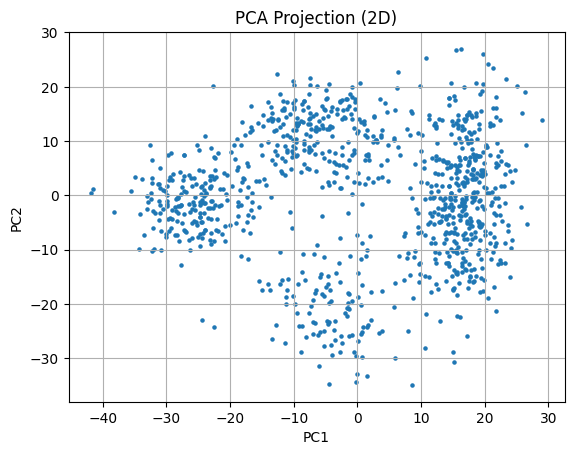

In [7]:
projector = PCA(n_components=2)
data_projected = projector.transform(pca_data)

# Scatter Plot
scatter_plot(data_projected, 'PCA Projection (2D)', 'PC1', 'PC2')

## UMAP (Uniform Manifold Approximation Projection)

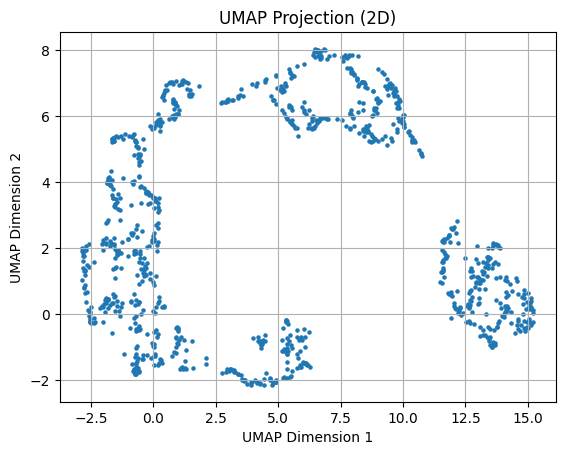

In [8]:
projector = umap.UMAP()
data_umap = projector.fit_transform(pca_data)

# Scatter Plot
scatter_plot(data_umap, 'UMAP Projection (2D)', 'UMAP Dimension 1', 'UMAP Dimension 2')

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

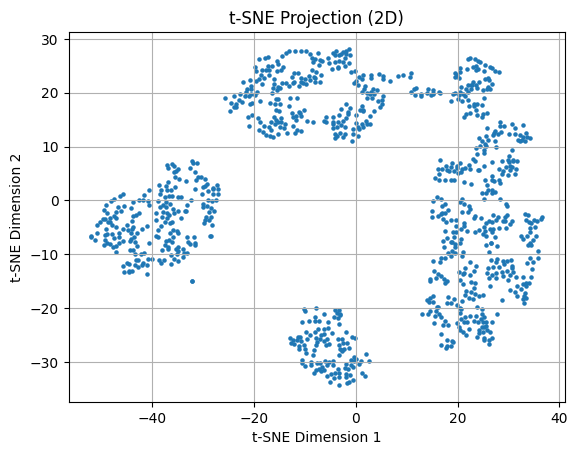

In [9]:
projector = TSNE(n_components=2, random_state=42)
data_tsne = projector.fit_transform(pca_data)

# Scatter Plot
scatter_plot(data_tsne, 't-SNE Projection (2D)', 't-SNE Dimension 1', 't-SNE Dimension 2')

# Expectation Maximization
---

In [10]:
def expectation_step(data, mean1, mean2, pi1, pi2):
    resp1 = pi1 * poisson.pmf(data, mean1)
    resp2 = pi2 * poisson.pmf(data, mean2)
    total = resp1 + resp2
    gamma1 = resp1 / total
    gamma2 = resp2 / total
    return gamma1, gamma2

def maximization_step(data, gamma1, gamma2):
    new_mean1 = np.sum(gamma1 * data) / np.sum(gamma1)
    new_mean2 = np.sum(gamma2 * data) / np.sum(gamma2)
    new_pi1 = np.mean(gamma1)
    new_pi2 = np.mean(gamma2)
    return new_mean1, new_mean2, new_pi1, new_pi2

def fit(data, tolerance=1e-6, max_iter=100):
    np.random.seed(42)
    mean1, mean2 = np.random.rand(2) * 10
    pi1, pi2 = 0.5, 0.5

    for _ in range(max_iter):
        # Expectation Step
        gamma1, gamma2 = expectation_step(data, mean1, mean2, pi1, pi2)
        # Maximization Step
        new_mean1, new_mean2, new_pi1, new_pi2 = maximization_step(data, gamma1, gamma2)
        # Convergence Check
        if np.abs(mean1 - new_mean1) < tolerance and np.abs(mean2 - new_mean2) < tolerance:
            break
        # Parameter Update after M-Step
        mean1, mean2, pi1, pi2 = new_mean1, new_mean2, new_pi1, new_pi2

    return mean1, mean2, pi1, pi2

mean1, mean2, pi1, pi2 = fit(em_data)

print("\n=== Analysis Results ===")
print(f"\nMeans:")
print(f"  With family planning:     {mean1:.6f}")
print(f"  Without family planning:  {mean2:.6f}")
print(f"\nProportions:")
print(f"  With family planning:     {pi1:.6f}")
print(f"  Without family planning:  {pi2:.6f}")
print("\n=====================")




=== Analysis Results ===

Means:
  With family planning:     1.791515
  Without family planning:  4.918455

Proportions:
  With family planning:     0.358643
  Without family planning:  0.641357

